In [66]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import h5py
import arviz as az
import rpy2.robjects as robjects
import matplotlib.cm as cm

cols = [col for i, col in enumerate(cm.tab20.colors) if i % 2 == 0]
cols.append(cm.Dark2(6))
cols = cols + [col for i, col in enumerate(cm.tab20.colors) if i % 2 != 0]
cols

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.7686274509803922, 0

In [67]:
taxa = ['B_caccae',
        'B_cellulosilyticus_WH2',
        'B_ovatus',
        'B_thetaiotaomicron',
        'B_uniformis',
        'B_vulgatus',
        'C_aerofaciens',
        'C_scindens',
        'C_spiroforme',
        'D_longicatena',
        'P_distasonis',
        'R_obeum']

pretty_names_dir = {'B_caccae': '$B. caccae$',
                'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
                'B_ovatus': '$B. ovatus$',
                'B_thetaiotaomicron': '$B. thetaiotaomicron$',
                'B_uniformis': '$B. uniformis$',
                'B_vulgatus': '$B. vulgatus$',
                'C_aerofaciens': '$C. aerofaciens$',
                'C_scindens': '$C. scindens$',
                'C_spiroforme': '$C. spiroforme$',
                'D_longicatena': '$D. longicatena$',
                'P_distasonis': '$P. distasonis$',
                'R_obeum': '$R. obeum$'}

In [68]:
path = Path(f'mcnulty-results/both/posteriors')
input_folder = Path(f'/hpcfs/home/ciencias_biologicas/a.castellanoss/masters-thesis/data/08-mdsine2-inference')
output_path = Path(f'/hpcfs/home/ciencias_biologicas/a.castellanoss/masters-thesis/data/09-mdsine2-rhats_and_rsme')

In [69]:
step = 1
start = 1
end = 25000+step
steps = np.arange(start, end, step)
burn_in = 1000
seeds = [0, 3, 4, 23, 127]

In [70]:
cluster_int_ind = []
cluster_int_prob = []
growth = []
self_interaction = []
interactions = []
perturbation = []
process_variance = []

for seed in seeds:
    filename = path / f'traces_lf0_s{seed}.hdf5'
    with h5py.File(filename, "r") as f:
        # Print all root level object names (aka keys) 
        # these can be group or dataset names 
        print("Keys: %s" % f.keys())
        # get first object name/key; may or may NOT be a group
        # cluster_int_ind_key = list(f.keys())[0]
        # cluster_int_prob_key = list(f.keys())[1]
        growth_key = list(f.keys())[2]
        self_interaction_key = list(f.keys())[17]
        interactions_key = list(f.keys())[4]
        perturbation_key = list(f.keys())[3]
        process_variance_key = list(f.keys())[16]

        # If a_group_key is a group name, 
        # this gets the object names in the group and returns as a list
        # Without burn in steps
        # print(cluster_int_ind_key)
        # cluster_int_ind.append(f[cluster_int_ind_key][()][1000:])
        # print(cluster_int_prob_key)
        # cluster_int_prob.append(f[cluster_int_prob_key][()][1000:])
        print(growth_key)
        growth.append(f[growth_key][()][1000:])
        print(self_interaction_key)
        self_interaction.append(f[self_interaction_key][()][1000:])
        print(interactions_key)
        interactions.append(f[interactions_key][()][1000:])
        print('Perturbation object' if perturbation_key in ['HF', 'LF'] else perturbation_key)
        perturbation.append(f['HF/HS'][()][1000:])           # perturbation_key
        print(process_variance_key)
        process_variance.append(f[process_variance_key][()][1000:])

# cluster_int_ind = np.array(cluster_int_ind)
# cluster_int_ind = np.nan_to_num(cluster_int_ind)
# cluster_int_prob = np.array(cluster_int_prob)
# cluster_int_prob = np.nan_to_num(cluster_int_prob)
growth = np.array(growth)
# growth = np.nan_to_num(growth)
self_interaction = np.array(self_interaction)
# self_interaction = np.nan_to_num(self_interaction)
interactions = np.array(interactions)
# interactions = np.nan_to_num(interactions)
perturbation = np.array(perturbation)
# perturbation = np.nan_to_num(perturbation)
process_variance = np.array(process_variance)
# process_variance = np.nan_to_num(process_variance)

Keys: <KeysViewHDF5 ['Cluster interaction indicator parameter', 'Cluster interaction probability', 'Growth parameter', 'HF', 'Interactions object', 'Latent trajectory parameter_1', 'Latent trajectory parameter_2', 'Latent trajectory parameter_3', 'Latent trajectory parameter_4', 'Latent trajectory parameter_5', 'Latent trajectory parameter_6', 'Latent trajectory parameter_7', 'Mean parameter for the normal prior of the interaction parameter', 'Mean parameter for the normal prior of the perturbation parameter_HF', 'Mean parameter for the truncated normal prior of the growth parameter', 'Mean parameter for the truncated normal prior of the self-interaction parameter', 'Process Variance parameter', 'Self interaction parameter', 'Variance parameter for the normal prior of the interaction parameter', 'Variance parameter for the normal prior of the perturbation parameter_HF']>
Growth parameter
Self interaction parameter
Interactions object
Perturbation object
Process Variance parameter
Keys:

In [6]:
def plot_species_posteriors(parameter, simtype, dataset, seeds=[0, 3, 4, 23, 127], step=1, start=0, end=25000, burn_in=1000):
    param = []
    pretty_taxa = [x if x not in pretty_names_dir else pretty_names_dir[x] for x in taxa]
    for seed in seeds:
        filename = input_folder / f'{simtype}/mcnulty-{dataset}-seed{seed}/traces.hdf5'
        with h5py.File(filename, "r") as f:
            print(parameter)
            param.append(f[parameter][()][burn_in:])
    param = np.array(param)

    steps = np.arange(start+burn_in, end, step)

    for species in range(param[0].shape[1]):
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        for seed in range(param.shape[0]):
            axs[0].hist(param[seed][:, species], bins=100, alpha=0.8, label=f'Seed {seeds[seed]}')
            axs[1].scatter(steps, param[seed][:, species], s=1, alpha=0.9, label=f'Seed {seeds[seed]}')
        axs[0].set_xlabel(f'{parameter} parameter value')
        axs[0].set_ylabel(f'Frequency')
        axs[1].set_xlabel(f'Step')
        axs[1].set_ylabel(f'{parameter} parameter value')
        fig.suptitle(f'{pretty_taxa[species]} {parameter} posteriors', y=0.94)
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

        output_folder = Path(f'{output_folder}/{simtype}/{dataset}/posteriors/{parameter.replace(" ", "_")}')
        output_folder.mkdir(exist_ok=True, parents=True)
        fig.savefig(f'{output_folder}/{parameter.replace(" ", "_")}_{taxa[species]}.pdf')

In [39]:
def plot_species_mean_posteriors(parameter, simtype, dataset, seeds=[0, 3, 4, 23, 127], step=1, start=0, end=25000, burn_in=1000):
    param = []
    for seed in seeds:
        filename = input_folder / f'{simtype}/mcnulty-{dataset}-seed{seed}/traces.hdf5'
        with h5py.File(filename, "r") as f:
            print(parameter)
            param.append(f[parameter][()][burn_in:])
    param = np.array(param)
    param = np.nanmean(param, axis=2)

    steps = np.arange(start+burn_in, end, step)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    for seed in range(param.shape[0]):
        axs[0].hist(param[seed], bins=100, alpha=0.8, label=f'Seed {seeds[seed]}')
        axs[1].scatter(steps, param[seed], s=1, alpha=0.9, label=f'Seed {seeds[seed]}')
    axs[0].set_xlabel(f'{parameter} parameter value')
    axs[0].set_ylabel(f'Frequency')
    axs[1].set_xlabel(f'Step')
    axs[1].set_ylabel(f'{parameter} parameter value')
    fig.suptitle(f'Mean {parameter} posteriors', y=0.94)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))
    
    output_folder = Path(f'{output_folder}/{simtype}/{dataset}/posteriors/{parameter.replace(" ", "_")}')
    output_folder.mkdir(exist_ok=True, parents=True)
    fig.savefig(f'{output_folder}/{parameter.replace(" ", "_")}_mean.pdf')

In [40]:
def plot_interaction_posteriors(simtype, dataset, seeds=[0, 3, 4, 23, 127], step=1, start=0, end=25000, burn_in=1000):
    parameter = 'Interactions object'
    param = []
    pretty_taxa = [x if x not in pretty_names_dir else pretty_names_dir[x] for x in taxa]
    for seed in seeds:
        filename = input_folder / f'{simtype}/mcnulty-{dataset}-seed{seed}/traces.hdf5'
        with h5py.File(filename, "r") as f:
            print(parameter)
            param.append(f[parameter][()][burn_in:])
    param = np.array(param)

    steps = np.arange(start+burn_in, end, step)

    for species1 in range(param[0].shape[1]):
        for species2 in range(param[0].shape[1]):
            fig, axs = plt.subplots(1, 2, figsize=(12, 5))
            for seed in range(param.shape[0]):
                axs[0].hist(param[seed][:, species1, species2], bins=100, alpha=0.8, label=f'Seed {seeds[seed]}')
                axs[1].scatter(steps, param[seed][:, species1, species2], s=1, alpha=0.9, label=f'Seed {seeds[seed]}')
            axs[0].set_xlabel(f'{parameter} parameter value')
            axs[0].set_ylabel(f'Frequency')
            axs[1].set_xlabel(f'Step')
            axs[1].set_ylabel(f'{parameter} parameter value')
            fig.suptitle(f'{pretty_taxa[species1]}-{pretty_taxa[species1]} {parameter} posteriors', y=0.94)
            handles, labels = axs[0].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

            output_folder = Path(f'{output_folder}/{simtype}/{dataset}/posteriors/{parameter.replace(" ", "_")}')
            output_folder.mkdir(exist_ok=True, parents=True)
            fig.savefig(f'{output_folder}/{parameter.replace(" ", "_")}_{taxa[species1]}_{taxa[species1]}.pdf')

In [41]:
def plot_interaction_mean_posteriors(parameter, simtype, dataset, seeds=[0, 3, 4, 23, 127], step=1, start=0, end=25000, burn_in=1000):
    parameter = 'Interactions object'
    param = []
    for seed in seeds:
        filename = input_folder / f'{simtype}/mcnulty-{dataset}-seed{seed}/traces.hdf5'
        with h5py.File(filename, "r") as f:
            print(parameter)
            param.append(f[parameter][()][burn_in:])
    param = np.array(param)
    param = np.nanmean(np.nanmean(param, axis=2), axis=2)

    steps = np.arange(start+burn_in, end, step)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    for seed in range(param.shape[0]):
        axs[0].hist(param[seed], bins=100, alpha=0.8, label=f'Seed {seeds[seed]}')
        axs[1].scatter(steps, param[seed], s=1, alpha=0.9, label=f'Seed {seeds[seed]}')
    axs[0].set_xlabel(f'{parameter} parameter value')
    axs[0].set_ylabel(f'Frequency')
    axs[1].set_xlabel(f'Step')
    axs[1].set_ylabel(f'{parameter} parameter value')
    fig.suptitle(f'Mean {parameter} posteriors', y=0.94)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))
    
    output_folder = Path(f'{output_folder}/{simtype}/{dataset}/posteriors/{parameter.replace(" ", "_")}')
    output_folder.mkdir(exist_ok=True, parents=True)
    fig.savefig(f'{output_folder}/{parameter.replace(" ", "_")}_mean.pdf')

In [42]:
def plot_process_variance_posteriors(simtype, dataset, seeds=[0, 3, 4, 23, 127], step=1, start=0, end=25000, burn_in=1000):
    parameter = 'Process Variance parameter'
    param = []
    for seed in seeds:
        filename = input_folder / f'{simtype}/mcnulty-{dataset}-seed{seed}/traces.hdf5'
        with h5py.File(filename, "r") as f:
            print(parameter)
            param.append(f[parameter][()][burn_in:])
    param = np.array(param)

    steps = np.arange(start+burn_in, end, step)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    for seed in range(param.shape[0]):
        axs[0].hist(param[seed], bins=100, alpha=0.8, label=f'Seed {seeds[seed]}')
        axs[1].scatter(steps, param[seed], s=1, alpha=0.9, label=f'Seed {seeds[seed]}')
    axs[0].set_xlabel(f'{parameter} parameter value')
    axs[0].set_ylabel(f'Frequency')
    axs[1].set_xlabel(f'Step')
    axs[1].set_ylabel(f'{parameter} parameter value')
    fig.suptitle(f'{parameter} posteriors', y=0.94)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

    output_folder = Path(f'{output_folder}/{simtype}/{dataset}/posteriors/{parameter.replace(" ", "_")}')
    output_folder.mkdir(exist_ok=True, parents=True)
    fig.savefig(f'{output_folder}/{parameter.replace(" ", "_")}.pdf')

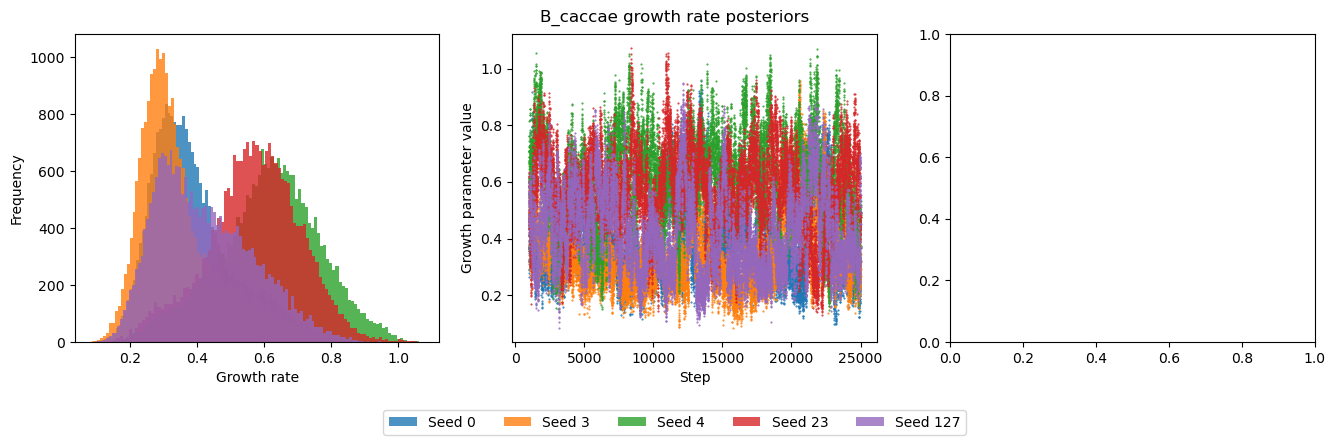

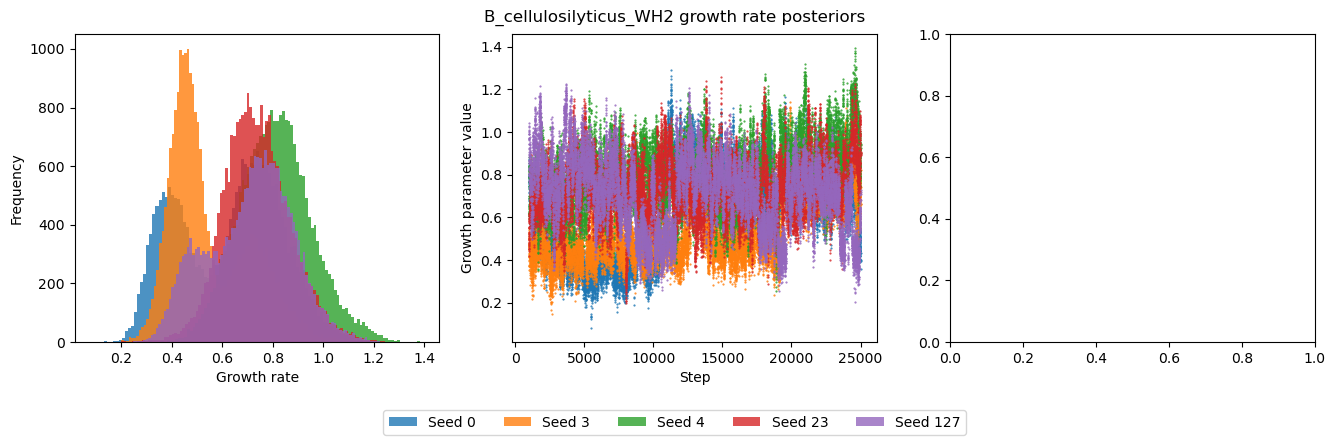

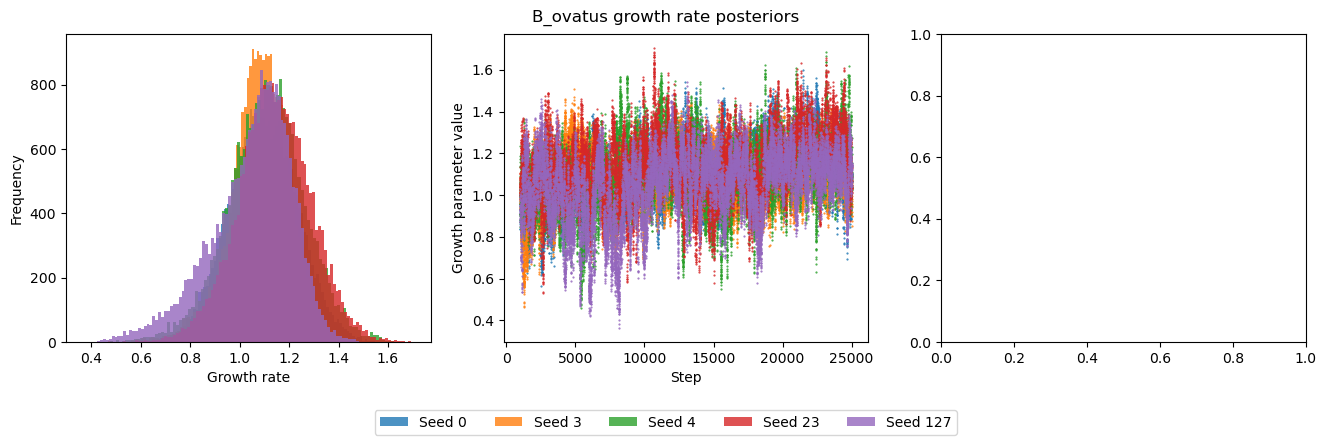

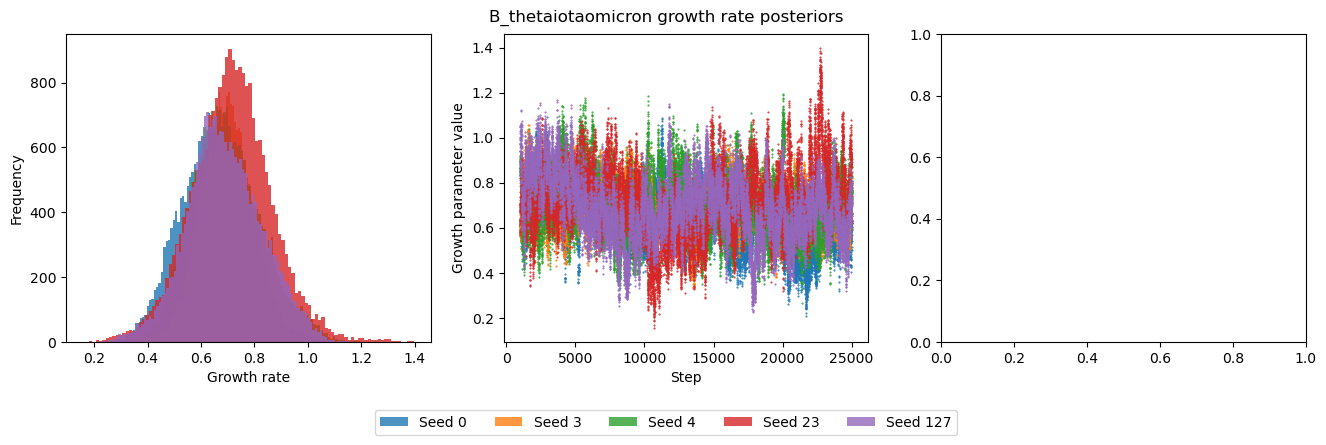

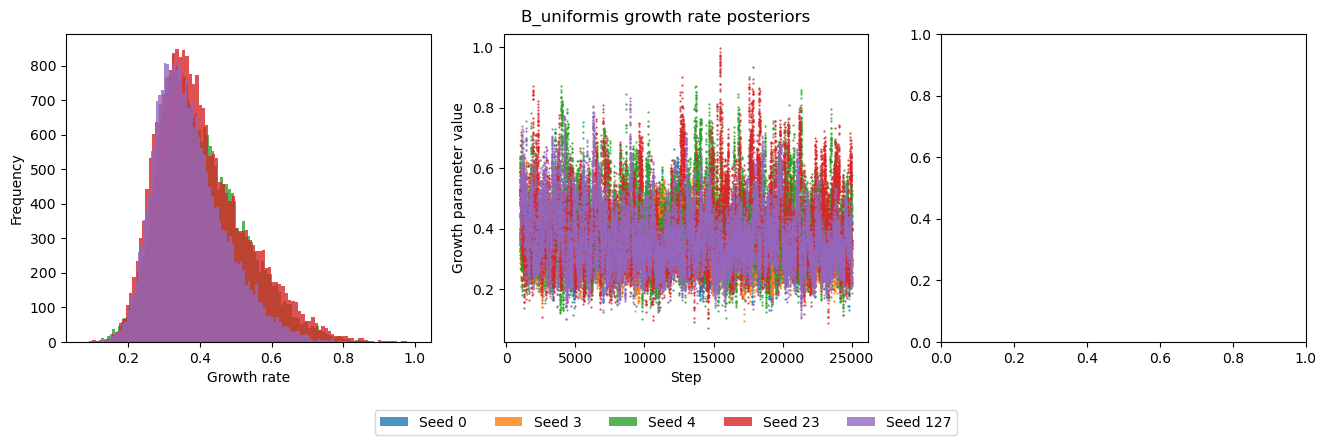

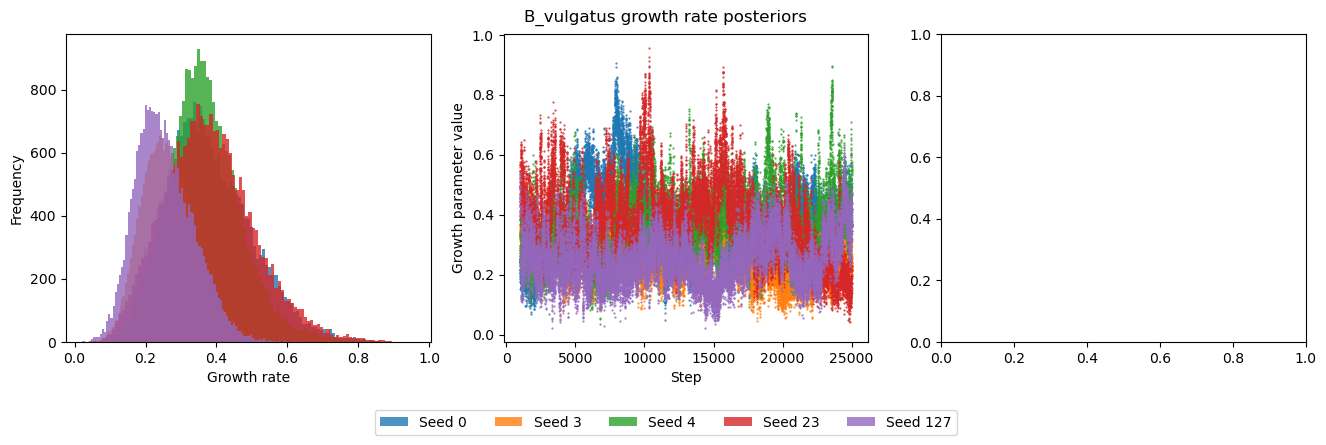

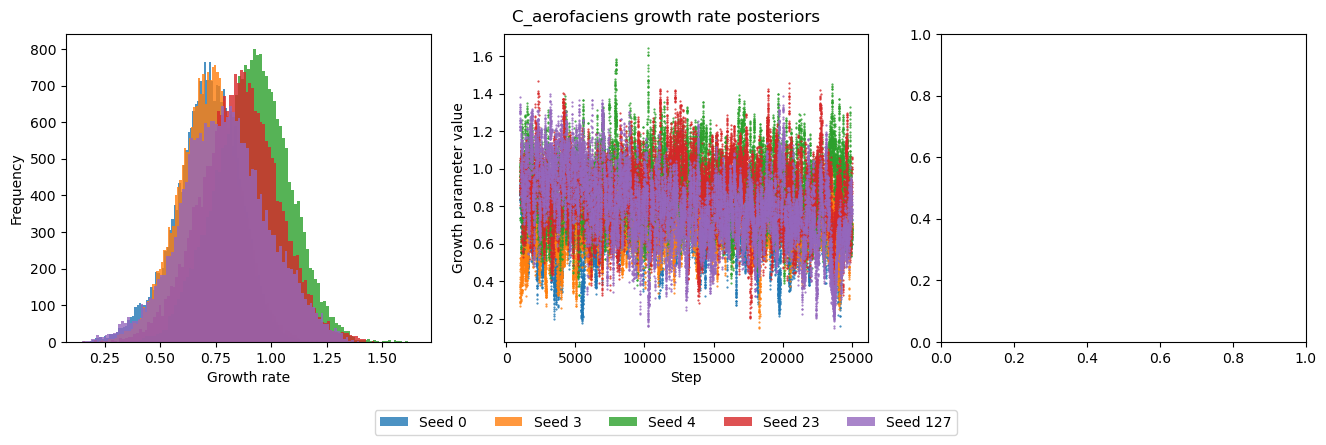

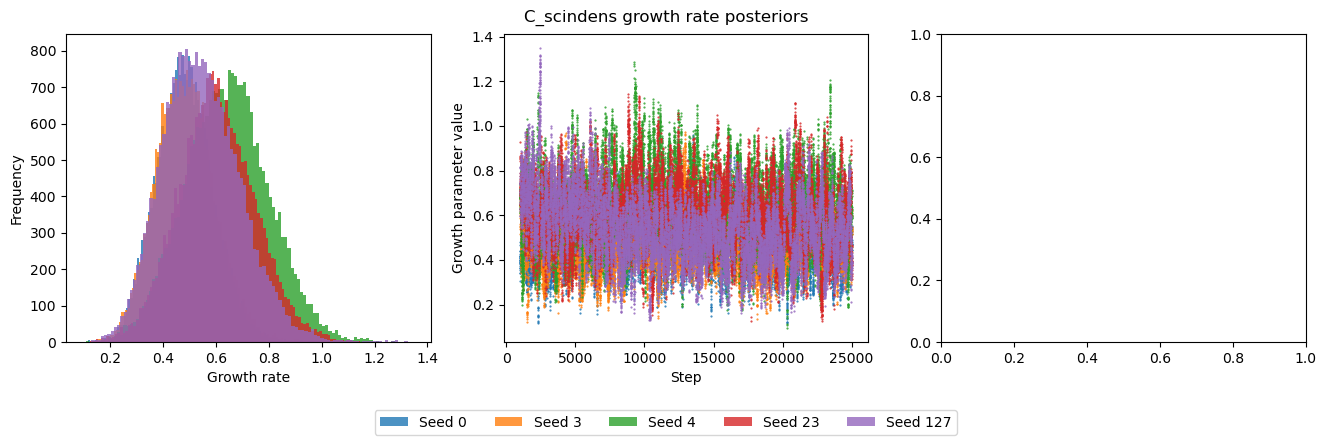

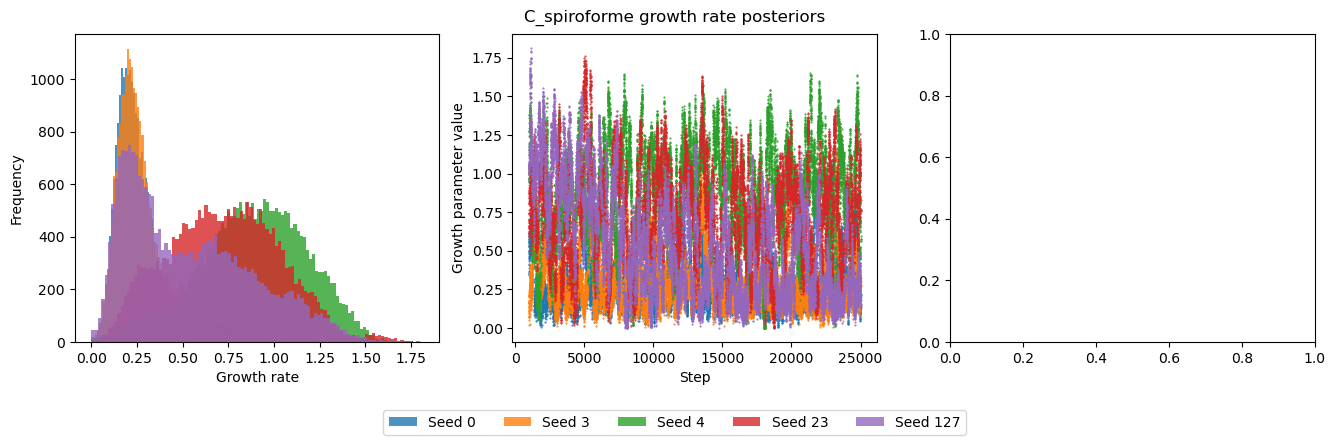

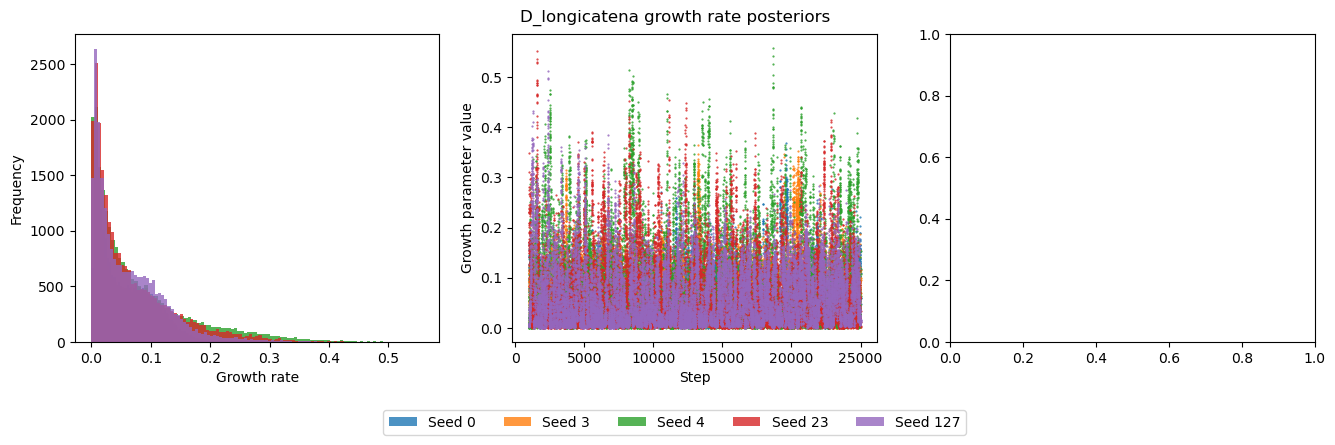

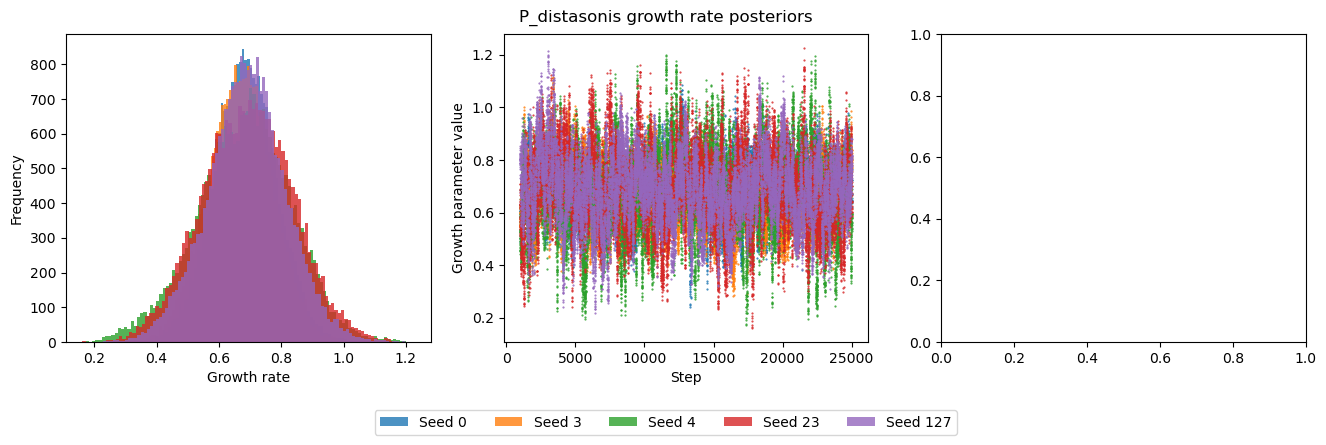

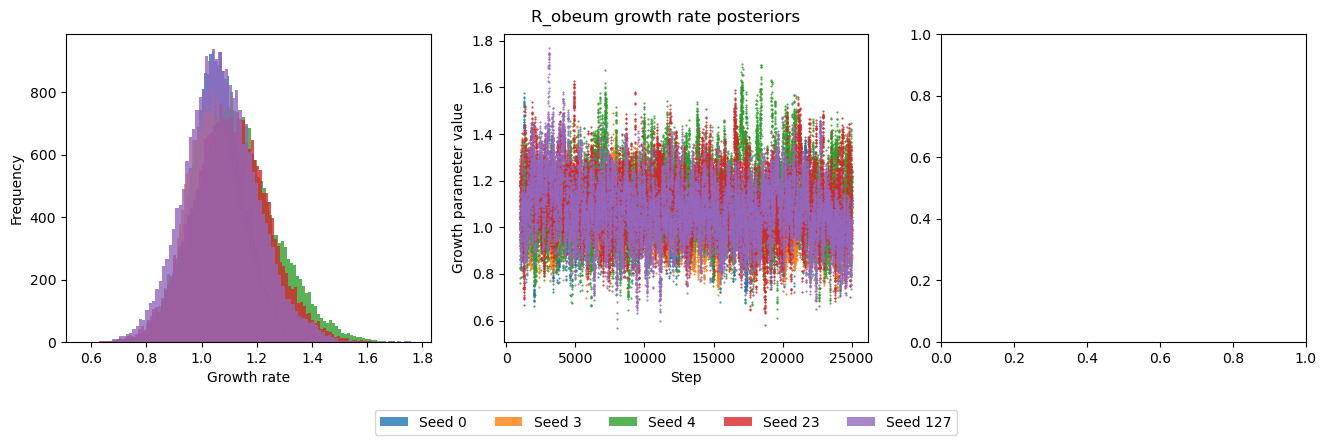

In [61]:
growth = np.array(growth)
steps = np.arange(start+burn_in, end, step)
for species in range(growth[0].shape[1]):
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    col = 0
    for seed in range(len(growth)):
        axs[0].hist(growth[seed][:, species], bins=100, alpha=0.8, label=f'Seed {seeds[seed]}', color=cols[col])
        col += 1
    axs[0].set_xlabel('Growth rate')
    axs[0].set_ylabel('Frequency')
    col = 0
    for seed in range(len(growth)):
        axs[1].scatter(steps, growth[seed][:, species], s=0.3, alpha=0.9, label=f'Seed {seeds[seed]}', color=cols[col])
        col += 1
    axs[1].set_xlabel('Step')
    axs[1].set_ylabel('Growth parameter value')
    fig.suptitle(f'{taxa[species]} growth rate posteriors', y=0.94)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.14))